   #                                        The Battle of the Neighbourhoods (Week- 2)

## Introduction

New York city is the largest metropolitan area of the United States. It is a melting pot of culture s all around the world. The city’s cultural pluralism is well reflected in its food culture. New York has one of the world's most dynamic and competitive restaurant scenes of the world. One report from earlier in the decade showed that 80% of New York restaurants close in the first five years. This exemplify the competitiveness of running a restaurant business in NYC.
This final project will explore the most suitable location for opening a Korean restaurant in NYC. Location is one of the most important factors behind the long term success of any business. It is even more important for a restaurant.

## Business Problem

As it has been discussed in the introduction that location is one the most important aspect of opening a restaurant, an investor must answer this question before deciding to start her business. The investor must figure out which place has the most demand for a Korean restaurant. By employing different techniques of Data Science such as Data Analysis and Visualization, this project will try to answer which area of New York city is the most suitable for opening a new Korean Restaurant.

## Target Audience

Korean restaurants have been growing at 3% rate annually in the US. Since NYC is a cosmopolitan city its inhabitants have a wide ranging palettes and they prefer ethno cuisines over many fast food or traditional western choices. So there are many advantages of opening a Korean restaurant in New York city. As a result, this project will be useful for any investor who would like to leverage these advantages and invest in a Korean restaurant in NYC. 

## Data

There are 3 types of data that we will need for this project:
1.	 Data regarding the boroughs and neighbourhoods of NYC.
2.	Latitude and longitude coordinates of those neighbourhoods. This is essential for plot the map and get the venue data.
3.	Restaurant Venue data. This data will be used to perform further analysis of the neighbourhoods. 
The data of NYC’s boroughs and neighbourhoods are collected from the open source dataat: https://cocl.us/new_york_dataset. Later, the geographical coordinates of the neighbourhoods will be extracted using the python geocoder package.
We utilize foursquare API to get the data about the venues. 


Let's import all the necessary libraries first

In [201]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library for handling requests

#from bs4 import BeautifulSoup
import os

!pip install folium
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # library for converting an address into latitude and longitude values
import requests 

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Libraries imported.


## Variables

In [202]:
# defining Foursquare credentials and version
CLIENT_ID = 'OLSR4VNL0DCKUOKZW2OGK0PVWK00RPWOFEFUQ1XR4N10AAVZ' 
CLIENT_SECRET = 'KPXSBBSQYG1IN0SXKWRA2RONMYQ5GAEIKYZV3RF4KNSUOKGT' 
VERSION = '20201230'

## Defining the functions we are going to use in this project

In [203]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

## Use the above codes to get our initial NYC data

In [204]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [205]:
ny_data.shape

(306, 4)

In total there are 306 different Neighborhoods in New York

## Preliminary data analysis

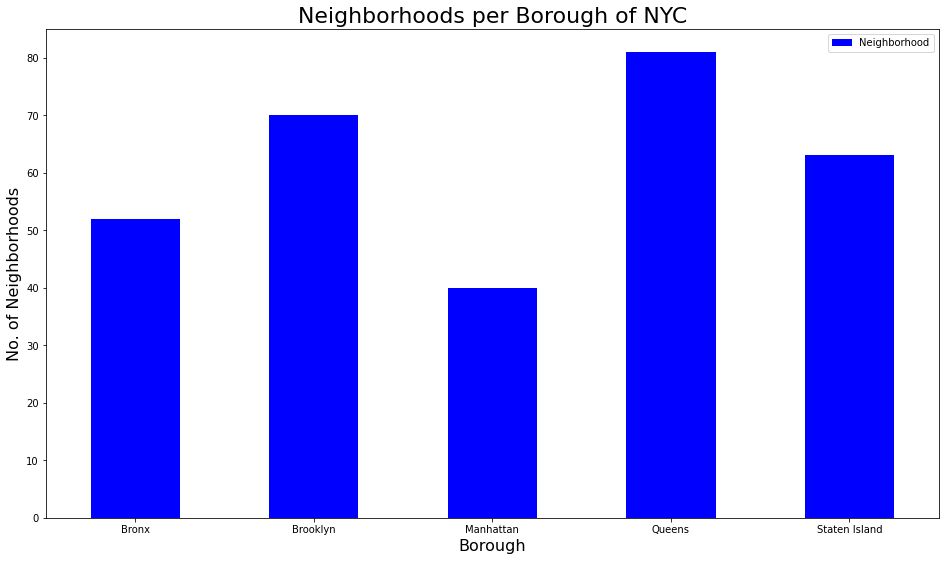

In [206]:
clr = "blue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(16,9), color=clr)
plt.title('Neighborhoods per Borough of NYC', fontsize = 22)
plt.xlabel('Borough', fontsize = 16)
plt.ylabel('No. of Neighborhoods',fontsize = 16)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

## Now we'll anaylze further to figure out the number of Korean restaurants in each neighbourhoods and borough of NYC. Later, we'll graph the result

In [207]:
# queens has most neighborhoods
# prepare neighborhood list that contains korean restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
korean_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    korean_restaurants=venues[venues['Category']=='Korean Restaurant']   
    print('(',count,'/',len(ny_data),')','Korean Restaurants in '+Neighborhood+', '+Borough+':'+str(len(korean_restaurants)))
    print(row)
    for resturant_detail in korean_restaurants.values.tolist():
        id, name , category=resturant_detail
        korean_rest_ny = korean_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Korean Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Korean Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Korean Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Korean Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Korean Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Korean Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Korean Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Korean Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Korean Restaurants in Norwood, Bronx:0
['Bronx', '

( 68 / 306 ) Korean Restaurants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Korean Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Korean Restaurants in Fort Greene, Brooklyn:0
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Korean Restaurants in Park Slope, Brooklyn:0
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Korean Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Korean Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Korean Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 75 / 306 ) Korean Restaurants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269778966]


( 132 / 306 ) Korean Restaurants in Jackson Heights, Queens:0
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Korean Restaurants in Elmhurst, Queens:0
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Korean Restaurants in Howard Beach, Queens:0
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Korean Restaurants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Korean Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Korean Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Korean Restaurants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 139 / 306 ) Korean Restaurants in Flushing, Queens:5
['Queens', 'Flushing', 40.76445419697846, -73.83177300329582]
( 140 / 306 ) Korean Re

( 200 / 306 ) Korean Restaurants in Stapleton, Staten Island:0
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Korean Restaurants in Rosebank, Staten Island:0
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Korean Restaurants in West Brighton, Staten Island:0
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Korean Restaurants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 204 / 306 ) Korean Restaurants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 205 / 306 ) Korean Restaurants in South Beach, Staten Island:0
['Staten Island', 'South Beach', 40.58024741350956, -74.0795529253982]
( 206 / 306 ) Korean Restaurants in Port Richmond, Staten Island:0
['Staten Island', 'Port Richmond', 40.63366930554365, -74.12943426797008]
( 207 / 306 ) Korean Restaurants in Mariner's Har

( 262 / 306 ) Korean Restaurants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Korean Restaurants in Mill Basin, Brooklyn:0
['Brooklyn', 'Mill Basin', 40.61597423962336, -73.91515391550404]
( 264 / 306 ) Korean Restaurants in Jamaica Hills, Queens:0
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 265 / 306 ) Korean Restaurants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 266 / 306 ) Korean Restaurants in Pomonok, Queens:0
['Queens', 'Pomonok', 40.73493618075478, -73.80486120040537]
( 267 / 306 ) Korean Restaurants in Astoria Heights, Queens:0
['Queens', 'Astoria Heights', 40.7703173929982, -73.89467996270574]
( 268 / 306 ) Korean Restaurants in Claremont Village, Bronx:0
['Bronx', 'Claremont Village', 40.83142834161548, -73.90119903387667]
( 269 / 306 ) Korean Restaurants in Concourse Village, Bronx:0
['Bronx', 'Concourse Village', 40.824780490842905, -73.9158

In [208]:
#korean_rest_ny.to_csv('korean_rest_ny_tocsv1.csv') 
# Saving the data up to this point to a .csv file due to limit on number of calls on FourSquare
korean_rest_ny.to_csv('korean_rest_ny_tocsv1.csv')

In [209]:
korean_ny = pd.read_csv('korean_rest_ny_tocsv1.csv')
korean_rest_ny.tail()

,Borough,Neighborhood,ID,Name
61,Manhattan,Midtown South,5aa9bc3b1f8ed6636dbb7fa5,Yoon Haeundae Galbi
62,Manhattan,Flatiron,591cdaf26f0aa22c76a53ff3,Cote
63,Queens,Sunnyside Gardens,4c0c2765a1b32d7f49279cf0,Sik Gaek
64,Queens,Sunnyside Gardens,57ab54da498e7d61e0c1fe0e,Pelicana Chicken
65,Bronx,Kingsbridge Heights,4be747b7bcef2d7fdb1b06e5,KBBQ


In [210]:
korean_rest_ny.shape

(66, 4)

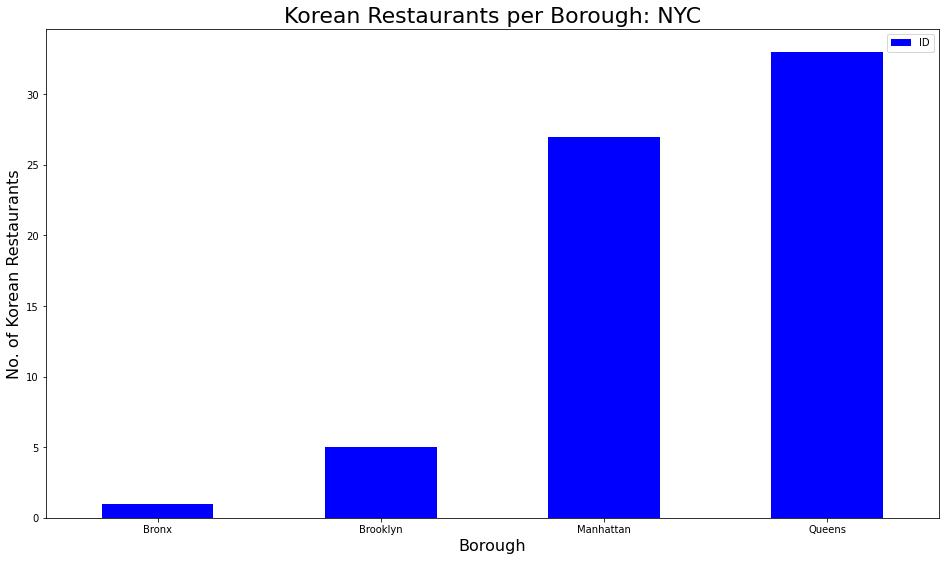

In [211]:
korean_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(16,9), color=clr)
plt.title('Korean Restaurants per Borough: NYC', fontsize = 22)
plt.xlabel('Borough', fontsize = 16)
plt.ylabel('No. of Korean Restaurants', fontsize=16)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [212]:
korean_rest_ny[korean_rest_ny['Borough']=='Bronx']

,Borough,Neighborhood,ID,Name
65,Bronx,Kingsbridge Heights,4be747b7bcef2d7fdb1b06e5,KBBQ


In [213]:
korean_rest_ny[korean_rest_ny['Borough']=='Brooklyn']

,Borough,Neighborhood,ID,Name
0,Brooklyn,Brighton Beach,4c9d5c0303133704a96f5ed5,Cafe At Your Mother-in-Law
1,Brooklyn,Prospect Heights,4fa162e0e4b0badc81404a51,Kimchi Grill
2,Brooklyn,North Side,59c295349b04732c1d51aa52,Kimbap Lab
3,Brooklyn,North Side,43db5698f964a5208a2e1fe3,Dokebi
4,Brooklyn,Fort Hamilton,4b240e1af964a5200a6024e3,Kimchee Korean Cuisine


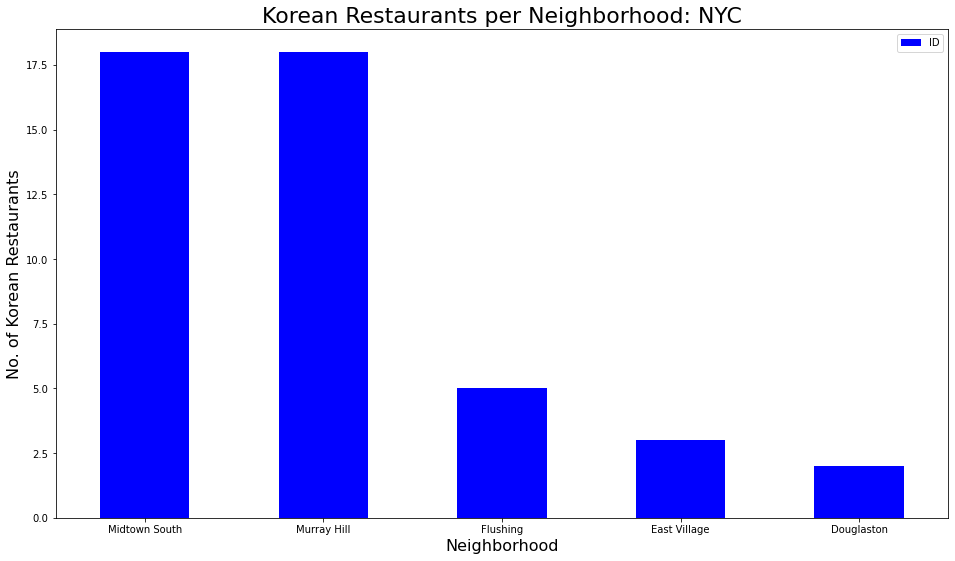

In [214]:
NOofNeigh = 5 # top number for graphing all the same past 5
korean_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(16,9), color=clr)
plt.title('Korean Restaurants per Neighborhood: NYC', fontsize = 22)
plt.xlabel('Neighborhood', fontsize = 16)
plt.ylabel('No. of Korean Restaurants', fontsize=16)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [215]:
korean_rest_ny[korean_rest_ny['Neighborhood']=='Murray Hill']

,Borough,Neighborhood,ID,Name
26,Queens,Murray Hill,4b830e44f964a520ebf430e3,Hahm Ji Bach - 함지박
27,Queens,Murray Hill,5590598a498eb1c3f975b6a6,Mr. Tofu
28,Queens,Murray Hill,4b8f0931f964a520d04533e3,Mapo BBQ
29,Queens,Murray Hill,4baeabe6f964a52037cd3be3,Kum Sung Chik Naengmyun
30,Queens,Murray Hill,4c7ad3dda86837048bee144d,Geo Si Gi Restaurant
31,Queens,Murray Hill,5518a1a8498e4c7fe6268b88,Jongro BBQ
32,Queens,Murray Hill,56db53cc498eed9b68621019,SGD Tofu House & BBQ
33,Queens,Murray Hill,4ca67385b7106dcb6e3b5ea5,Bonjuk Korean Traditional Porridge Restaurant
34,Queens,Murray Hill,5cbb9019237dee002cb9f069,Jeong Yook
35,Queens,Murray Hill,4ad3bfabf964a52016e620e3,Han Joo


In [216]:
korean_rest_ny[korean_rest_ny['Neighborhood']=='Midtown South']

,Borough,Neighborhood,ID,Name
44,Manhattan,Midtown South,540f86da498e020149fa7676,Jongro BBQ
45,Manhattan,Midtown South,5c01ccc14ac28a002c3cbd8d,Anytime Soju Bar and Eatery
46,Manhattan,Midtown South,5aab0d2ae179107b87768ff8,Samwon Garden BBQ
47,Manhattan,Midtown South,4a9d3c1af964a520ff3720e3,E-Mo Kimbap
48,Manhattan,Midtown South,49becfd3f964a520e0541fe3,Woorijip
49,Manhattan,Midtown South,40bbc700f964a520a2001fe3,New Wonjo
50,Manhattan,Midtown South,49f47acdf964a5200b6b1fe3,Pocha 32
51,Manhattan,Midtown South,517563f9498e0a4859d08fe4,BCD Tofu House
52,Manhattan,Midtown South,4a1dd896f964a520a27b1fe3,Cho Dang Gol
53,Manhattan,Midtown South,5585f499498e12103dc16c21,Five Senses


So according to the analysis there are 66 Korean Restaurants across the New York City.

Bronx only has one Korean restaurant. Queens have the most number of neighbourhoods and also the highest number of Japanese restaurants. Additionally, we see the number of restaurants that the top 5 neighbourhoods have. The neighbourhoods Midtown High and Murray Hill have the highest number of Korean restaurants in all of NYC. Each has 18 Korean neighbourhoods. While Midtown High neighbourhood is in Manhattan, Murray Hill lies within Queens.

Now we will extract the ranking for each individual restaurant for further analysis.


In [217]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
korean_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in korean_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(korean_rest_ny),')','processed')
    korean_rest_stats_ny = korean_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
korean_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5fec97104bde931d9e95682a'}, 'response': {'venue': {'id': '4c9d5c0303133704a96f5ed5', 'name': 'Cafe At Your Mother-in-Law', 'contact': {'phone': '7189424088', 'formattedPhone': '(718) 942-4088', 'twitter': 'cafeaymil_ny'}, 'location': {'address': '3071 Brighton 4th St', 'lat': 40.57757524231774, 'lng': -73.96344895612154, 'labeledLatLngs': [{'label': 'display', 'lat': 40.57757524231774, 'lng': -73.96344895612154}, {'label': 'entrance', 'lat': 40.577515, 'lng': -73.963289}], 'postalCode': '11235', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3071 Brighton 4th St', 'Brooklyn, NY 11235', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-at-your-motherinlaw/4c9d5c0303133704a96f5ed5', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korea

{'meta': {'code': 200, 'requestId': '5fec97108028c13d49ac5734'}, 'response': {'venue': {'id': '59c295349b04732c1d51aa52', 'name': 'Kimbap Lab', 'contact': {'phone': '7187342321', 'formattedPhone': '(718) 734-2321'}, 'location': {'address': '238 Bedford Avenue', 'lat': 40.71616, 'lng': -73.95953, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71616, 'lng': -73.95953}], 'postalCode': '11249', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['238 Bedford Avenue', 'Brooklyn, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kimbap-lab/59c295349b04732c1d51aa52', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}, {'id': '56aa371be4b08b9a8d57350b', 'name': 'Food Stand', 'pluralName': 'Food Stands', 'shortName': 'Food Stand', 'i

{'meta': {'code': 200, 'requestId': '5fec9711da8249517fffbbed'}, 'response': {'venue': {'id': '4b240e1af964a5200a6024e3', 'name': 'Kimchee Korean Cuisine', 'contact': {'phone': '7185675741', 'formattedPhone': '(718) 567-5741'}, 'location': {'address': '9324 3rd Ave', 'crossStreet': 'at 94th St', 'lat': 40.61797065682916, 'lng': -74.03344650023448, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61797065682916, 'lng': -74.03344650023448}, {'label': 'entrance', 'lat': 40.618097, 'lng': -74.033403}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9324 3rd Ave (at 94th St)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kimchee-korean-cuisine/4b240e1af964a5200a6024e3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 's

{'meta': {'code': 200, 'requestId': '5fec9711ba6fa474b8d8c311'}, 'response': {'venue': {'id': '5dbcafa6e40280000819d3db', 'name': 'Kochi', 'contact': {}, 'location': {'address': '652 10th Ave', 'crossStreet': '46th Street', 'lat': 40.76203, 'lng': -73.99355, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76203, 'lng': -73.99355}], 'postalCode': '10036', 'cc': 'US', 'neighborhood': "Hell's Kitchen", 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['652 10th Ave (46th Street)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kochi/5dbcafa6e40280000819d3db', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'url': 'http://kochinyc.com', 'price': {'tier': 2, 'message': 'Moderat

{'meta': {'code': 200, 'requestId': '5fec97114bde931d9e956c2b'}, 'response': {'venue': {'id': '5dec54b8f93ca90007806f97', 'name': 'Mokyo', 'contact': {}, 'location': {'address': '109 Saint Marks Pl', 'lat': 40.727179, 'lng': -73.984056, 'labeledLatLngs': [{'label': 'display', 'lat': 40.727179, 'lng': -73.984056}, {'label': 'entrance', 'lat': 40.727122, 'lng': -73.983949}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['109 Saint Marks Pl', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mokyo/5dec54b8f93ca90007806f97', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {

{'meta': {'code': 200, 'requestId': '5fec9712c94739757dda942c'}, 'response': {'venue': {'id': '4e67f1c7d16433b90090c8f3', 'name': 'Jungsik', 'contact': {'phone': '2122190900', 'formattedPhone': '(212) 219-0900', 'twitter': 'jungsikdang'}, 'location': {'address': '2 Harrison St', 'crossStreet': 'at Hudson St.', 'lat': 40.718694630954566, 'lng': -74.00906972656956, 'labeledLatLngs': [{'label': 'display', 'lat': 40.718694630954566, 'lng': -74.00906972656956}, {'label': 'entrance', 'lat': 40.718744, 'lng': -74.009072}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2 Harrison St (at Hudson St.)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jungsik/4e67f1c7d16433b90090c8f3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean

{'meta': {'code': 200, 'requestId': '5fec971554a4277f8fb5d61a'}, 'response': {'venue': {'id': '59aa0677e17910245d942204', 'name': 'Jeju Noodle Bar', 'contact': {'phone': '2019213333', 'formattedPhone': '(201) 921-3333', 'instagram': 'jejunoodlebar'}, 'location': {'address': '679 Greenwich St', 'crossStreet': 'at Christopher St', 'lat': 40.73294539559912, 'lng': -74.0073655954149, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73294539559912, 'lng': -74.0073655954149}, {'label': 'entrance', 'lat': 40.733036, 'lng': -74.007344}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['679 Greenwich St (at Christopher St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jeju-noodle-bar/59aa0677e17910245d942204', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net

{'meta': {'code': 200, 'requestId': '5fec97158028c13d49ac6528'}, 'response': {'venue': {'id': '4ae39cb6f964a520439721e3', 'name': 'Debasaki', 'contact': {'phone': '7188866878', 'formattedPhone': '(718) 886-6878'}, 'location': {'address': '33-67 Farrington St', 'lat': 40.764851521130126, 'lng': -73.83176733519196, 'labeledLatLngs': [{'label': 'display', 'lat': 40.764851521130126, 'lng': -73.83176733519196}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-67 Farrington St', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/debasaki/4ae39cb6f964a520439721e3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d14c941735', 'name': 'Wings Joint', 'pluralName': 'Wings 

{'meta': {'code': 200, 'requestId': '5fec97152c123671c366cbd9'}, 'response': {'venue': {'id': '4d7a7310fed6a09393e5a256', 'name': 'Joomakgol (주막골)', 'contact': {'phone': '7184600042', 'formattedPhone': '(718) 460-0042'}, 'location': {'address': '35-26 Farrington St', 'crossStreet': 'at Northern Blvd', 'lat': 40.763671875, 'lng': -73.83174896240234, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763671875, 'lng': -73.83174896240234}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['35-26 Farrington St (at Northern Blvd)', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joomakgol-%EC%A3%BC%EB%A7%89%EA%B3%A8/4d7a7310fed6a09393e5a256', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 

{'meta': {'code': 200, 'requestId': '5fec97162742ec1772a8d734'}, 'response': {'venue': {'id': '4b74a1d6f964a52009e92de3', 'name': 'Emone Korean BBQ Restaurant', 'contact': {'phone': '7183533444', 'formattedPhone': '(718) 353-3444'}, 'location': {'address': '36-26 Union St', 'lat': 40.763, 'lng': -73.828153, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763, 'lng': -73.828153}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['36-26 Union St', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/emone-korean-bbq-restaurant/4b74a1d6f964a52009e92de3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Moderate', '

{'meta': {'code': 200, 'requestId': '5fec971676a2df29a0000c5a'}, 'response': {'venue': {'id': '4c8425a0d34ca1436d443c80', 'name': 'Ding Dong', 'contact': {'phone': '7182254898', 'formattedPhone': '(718) 225-4898'}, 'location': {'address': '39-23 Bell blBvd', 'lat': 40.76465431727157, 'lng': -73.7715581249102, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76465431727157, 'lng': -73.7715581249102}], 'postalCode': '11361', 'cc': 'US', 'city': 'Bayside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['39-23 Bell blBvd', 'Bayside, NY 11361', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ding-dong/4c8425a0d34ca1436d443c80', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d142941735', 'name': 'Asian Restaurant', 'pluralName': 'Asian Resta

{'meta': {'code': 200, 'requestId': '5fec97168c47f042d739a35c'}, 'response': {'venue': {'id': '4c71ac6dad69b60c49ac81b9', 'name': 'Taeneung', 'contact': {'phone': '7186313636', 'formattedPhone': '(718) 631-3636'}, 'location': {'address': '248-25 northen Blvd', 'lat': 40.767535, 'lng': -73.73851195, 'labeledLatLngs': [{'label': 'display', 'lat': 40.767535, 'lng': -73.73851195}], 'postalCode': '11362', 'cc': 'US', 'city': 'Little Neck', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['248-25 northen Blvd', 'Little Neck, NY 11362', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/taeneung/4c71ac6dad69b60c49ac81b9', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '

{'meta': {'code': 200, 'requestId': '5fec971776a2df29a000100d'}, 'response': {'venue': {'id': '526c1acf11d288dc8354b7b9', 'name': 'Rolly Kimbab', 'contact': {'phone': '3474084172', 'formattedPhone': '(347) 408-4172'}, 'location': {'address': '61-23 Springfield Blvd', 'lat': 40.74853074631299, 'lng': -73.756334784455, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74853074631299, 'lng': -73.756334784455}], 'postalCode': '11364', 'cc': 'US', 'city': 'Bayside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['61-23 Springfield Blvd', 'Bayside, NY 11364', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rolly-kimbab/526c1acf11d288dc8354b7b9', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 11}, 'url': 'http://rollykimbab

{'meta': {'code': 200, 'requestId': '5fec9717d3e79e09bcb5f180'}, 'response': {'venue': {'id': '5590598a498eb1c3f975b6a6', 'name': 'Mr. Tofu', 'contact': {'phone': '3475060797', 'formattedPhone': '(347) 506-0797'}, 'location': {'address': '152-22 Northern Blvd', 'lat': 40.76484061391216, 'lng': -73.81226649660726, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76484061391216, 'lng': -73.81226649660726}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['152-22 Northern Blvd', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mr-tofu/5590598a498eb1c3f975b6a6', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 2, 'message': 'M

{'meta': {'code': 200, 'requestId': '5fec97186ef73c60c6b751bb'}, 'response': {'venue': {'id': '4baeabe6f964a52037cd3be3', 'name': 'Kum Sung Chik Naengmyun', 'contact': {'phone': '7185394596', 'formattedPhone': '(718) 539-4596'}, 'location': {'address': '40-07 149th Pl', 'lat': 40.76312208490418, 'lng': -73.81509111682782, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76312208490418, 'lng': -73.81509111682782}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['40-07 149th Pl', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kum-sung-chik-naengmyun/4baeabe6f964a52037cd3be3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier

{'meta': {'code': 200, 'requestId': '5fec97186ef73c60c6b7529e'}, 'response': {'venue': {'id': '5518a1a8498e4c7fe6268b88', 'name': 'Jongro BBQ', 'contact': {}, 'location': {'address': '15514 Roosevelt Ave', 'lat': 40.7641127882201, 'lng': -73.8094035270143, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7641127882201, 'lng': -73.8094035270143}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['15514 Roosevelt Ave', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/jongro-bbq/5518a1a8498e4c7fe6268b88', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 50, 'groups

{'meta': {'code': 200, 'requestId': '5fec97189d303e30feff5f43'}, 'response': {'venue': {'id': '4ca67385b7106dcb6e3b5ea5', 'name': 'Bonjuk Korean Traditional Porridge Restaurant', 'contact': {'phone': '7189395868', 'formattedPhone': '(718) 939-5868'}, 'location': {'address': '15226 Northern Blvd', 'lat': 40.76487281750307, 'lng': -73.8121110221354, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76487281750307, 'lng': -73.8121110221354}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['15226 Northern Blvd', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bonjuk-korean-traditional-porridge-restaurant/4ca67385b7106dcb6e3b5ea5', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verifie

{'meta': {'code': 200, 'requestId': '5fec9719ba6fa474b8d8db7a'}, 'response': {'venue': {'id': '4ad3bfabf964a52016e620e3', 'name': 'Han Joo', 'contact': {'phone': '7183596888', 'formattedPhone': '(718) 359-6888'}, 'location': {'address': '41-06 149th Pl', 'crossStreet': 'at 41st Ave', 'lat': 40.762274065368665, 'lng': -73.8147692298185, 'labeledLatLngs': [{'label': 'display', 'lat': 40.762274065368665, 'lng': -73.8147692298185}], 'postalCode': '11355', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['41-06 149th Pl (at 41st Ave)', 'Flushing, NY 11355', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/han-joo/4ad3bfabf964a52016e620e3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 20}, 'p

{'meta': {'code': 200, 'requestId': '5fec9719499ac81c60d7e8d8'}, 'response': {'venue': {'id': '5147a0bce4b09c3bed35c23b', 'name': '큰손 칼국수', 'contact': {}, 'location': {'address': '35-04 154th St', 'lat': 40.76586428971515, 'lng': -73.81090861460873, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76586428971515, 'lng': -73.81090861460873}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['35-04 154th St', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/%ED%81%B0%EC%86%90-%EC%B9%BC%EA%B5%AD%EC%88%98/5147a0bce4b09c3bed35c23b', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'lik

{'meta': {'code': 200, 'requestId': '5fec971a02573325d4a5cf36'}, 'response': {'venue': {'id': '4d85677302eb5481ee0744f5', 'name': 'Gugongtan', 'contact': {}, 'location': {'address': '40-03 149th Place', 'crossStreet': 'Roosevelt Ave', 'lat': 40.76317994459784, 'lng': -73.81510419142043, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76317994459784, 'lng': -73.81510419142043}], 'postalCode': '11354', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['40-03 149th Place (Roosevelt Ave)', 'New York, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gugongtan/4d85677302eb5481ee0744f5', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message': 'Moderate', 'c

                         ID  \
0  51c612d9498e52a02241e27b   

                                                Name  Likes  Rating  Tips  
0  병천자매순대 (Byun Chung Soon Dae Restaurant) (Byun ...     16     6.8     4  
( 41 / 66 ) processed
{'meta': {'code': 200, 'requestId': '5fec971a499ac81c60d7eaf1'}, 'response': {'venue': {'id': '4e665433b0fb188e8f56fb2b', 'name': 'Su Ra Chung', 'contact': {'phone': '7186619292', 'formattedPhone': '(718) 661-9292'}, 'location': {'address': '149-09 41st Ave', 'lat': 40.76226220292855, 'lng': -73.81543261486227, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76226220292855, 'lng': -73.81543261486227}], 'postalCode': '11355', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['149-09 41st Ave', 'Flushing, NY 11355', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/su-ra-chung/4e665433b0fb188e8f56fb2b', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'K

{'meta': {'code': 200, 'requestId': '5fec971a4536486d2abdae9b'}, 'response': {'venue': {'id': '56522cdc498ee09c2f9777d5', 'name': 'Daeji Daeji 돼지되지', 'contact': {'phone': '7188866797', 'formattedPhone': '(718) 886-6797'}, 'location': {'address': '41-08 149th Pl', 'lat': 40.76221186792486, 'lng': -73.81467031272346, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76221186792486, 'lng': -73.81467031272346}], 'postalCode': '11355', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['41-08 149th Pl', 'Flushing, NY 11355', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/daeji-daeji-%EB%8F%BC%EC%A7%80%EB%90%98%EC%A7%80/56522cdc498ee09c2f9777d5', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1

{'meta': {'code': 200, 'requestId': '5fec971bb1fef738c4267935'}, 'response': {'venue': {'id': '5aab0d2ae179107b87768ff8', 'name': 'Samwon Garden BBQ', 'contact': {'phone': '2126953131', 'formattedPhone': '(212) 695-3131', 'twitter': 'samwongardenbbq', 'instagram': 'samwongardenbbq', 'facebook': '161860147804745', 'facebookUsername': 'samwongardenNY', 'facebookName': 'Samwon Garden BBQ'}, 'location': {'address': '37 W 32nd St', 'crossStreet': 'btwn 5th & 6th Ave', 'lat': 40.74801, 'lng': -73.98728, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74801, 'lng': -73.98728}, {'label': 'entrance', 'lat': 40.748001, 'lng': -73.987282}], 'postalCode': '10001', 'cc': 'US', 'neighborhood': 'Koreatown', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['37 W 32nd St (btwn 5th & 6th Ave)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/samwon-garden-bbq/5aab0d2ae179107b87768ff8', 'categories': [{'id': '4bf58dd8d48988d113941735

{'meta': {'code': 200, 'requestId': '5fec971b8549cf75f7897673'}, 'response': {'venue': {'id': '49becfd3f964a520e0541fe3', 'name': 'Woorijip', 'contact': {'phone': '2122441115', 'formattedPhone': '(212) 244-1115'}, 'location': {'address': '12 W 32nd St', 'crossStreet': 'btwn Broadway & 5th Ave', 'lat': 40.7476231963955, 'lng': -73.98637205431945, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7476231963955, 'lng': -73.98637205431945}], 'postalCode': '10001', 'cc': 'US', 'neighborhood': 'Ktown', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['12 W 32nd St (btwn Broadway & 5th Ave)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/woorijip/49becfd3f964a520e0541fe3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 've

{'meta': {'code': 200, 'requestId': '5fec971c5c2c4d623f05089c'}, 'response': {'venue': {'id': '49f47acdf964a5200b6b1fe3', 'name': 'Pocha 32', 'contact': {'phone': '2122791876', 'formattedPhone': '(212) 279-1876'}, 'location': {'address': '15 W 32nd St', 'crossStreet': 'btwn Broadway & 5th Ave', 'lat': 40.747634864616465, 'lng': -73.98648664038662, 'labeledLatLngs': [{'label': 'display', 'lat': 40.747634864616465, 'lng': -73.98648664038662}, {'label': 'entrance', 'lat': 40.747643, 'lng': -73.986431}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['15 W 32nd St (btwn Broadway & 5th Ave)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pocha-32/49f47acdf964a5200b6b1fe3', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 's

                         ID            Name  Likes  Rating  Tips
0  517563f9498e0a4859d08fe4  BCD Tofu House   1229     8.9   205
( 52 / 66 ) processed
{'meta': {'code': 200, 'requestId': '5fec971c35102e55807d3d10'}, 'response': {'venue': {'id': '4a1dd896f964a520a27b1fe3', 'name': 'Cho Dang Gol', 'contact': {'phone': '2126958222', 'formattedPhone': '(212) 695-8222', 'instagram': 'chodanggol', 'facebook': '115988201756815', 'facebookUsername': 'ChoDangGol', 'facebookName': 'Cho Dang Gol'}, 'location': {'address': '55 W 35th St', 'crossStreet': 'btwn 5th & 6th Ave', 'lat': 40.750158472609044, 'lng': -73.986438204421, 'labeledLatLngs': [{'label': 'display', 'lat': 40.750158472609044, 'lng': -73.986438204421}, {'label': 'entrance', 'lat': 40.750145, 'lng': -73.98633}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['55 W 35th St (btwn 5th & 6th Ave)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://fo

{'meta': {'code': 200, 'requestId': '5fec971d4bde931d9e958f25'}, 'response': {'venue': {'id': '5db4cd15132372000785f9cf', 'name': 'Hong Chun Cheon 닭갈비', 'contact': {'phone': '2126957272', 'formattedPhone': '(212) 695-7272'}, 'location': {'address': '2 W 32nd St Fl 2', 'lat': 40.747406, 'lng': -73.98609, 'labeledLatLngs': [{'label': 'display', 'lat': 40.747406, 'lng': -73.98609}], 'postalCode': '10001', 'cc': 'US', 'neighborhood': 'Koreatown', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2 W 32nd St Fl 2', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hong-chun-cheon-%EB%8B%AD%EA%B0%88%EB%B9%84/5db4cd15132372000785f9cf', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 

{'meta': {'code': 200, 'requestId': '5fec971d499ac81c60d7f375'}, 'response': {'venue': {'id': '4c254ba6136d20a19f63e361', 'name': 'miss KOREA BBQ', 'contact': {'phone': '2125944963', 'formattedPhone': '(212) 594-4963', 'twitter': 'misskoreabbq', 'facebook': '135037553209059', 'facebookUsername': 'missKOREABBQ', 'facebookName': 'miss KOREA BBQ'}, 'location': {'address': '10 W 32nd St Fl 3 #1', 'crossStreet': 'btwn Broadway & 5th Ave', 'lat': 40.747286, 'lng': -73.98641, 'labeledLatLngs': [{'label': 'display', 'lat': 40.747286, 'lng': -73.98641}, {'label': 'entrance', 'lat': 40.747426, 'lng': -73.986378}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10 W 32nd St Fl 3 #1 (btwn Broadway & 5th Ave)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/miss-korea-bbq/4c254ba6136d20a19f63e361', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': '

{'meta': {'code': 200, 'requestId': '5fec971db4359f7d9650da82'}, 'response': {'venue': {'id': '547d03e3498eb32c879589da', 'name': 'Baekjeong NYC (Kang Ho Dong Baekjeong)', 'contact': {'phone': '2129669839', 'formattedPhone': '(212) 966-9839', 'twitter': 'baekjeongnyc', 'instagram': 'baekjeongnyc', 'facebook': '425961227537735', 'facebookUsername': 'baekjeongnyc', 'facebookName': 'Kang Ho Dong Baekjeong - Koreatown NYC'}, 'location': {'address': '1 E 32nd St', 'crossStreet': 'at 5th Ave', 'lat': 40.74709879834891, 'lng': -73.98519423416221, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74709879834891, 'lng': -73.98519423416221}, {'label': 'entrance', 'lat': 40.747063, 'lng': -73.985067}], 'postalCode': '10016', 'cc': 'US', 'neighborhood': 'Koreatown', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1 E 32nd St (at 5th Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/baekjeong-nyc/547d03e3498eb32c879589da',

{'meta': {'code': 200, 'requestId': '5fec971efb7e627cbe0d6299'}, 'response': {'venue': {'id': '505293ace4b0c6b684be5371', 'name': 'Bangia 반지하', 'contact': {'phone': '2126796790', 'formattedPhone': '(212) 679-6790', 'twitter': 'bangianyc', 'facebook': '280617065384413', 'facebookUsername': 'BangiaNYC', 'facebookName': 'Bangia 반지하'}, 'location': {'address': '11 E 32nd St', 'crossStreet': 'btwn 5th & Madison Ave', 'lat': 40.74692240149892, 'lng': -73.98477692181021, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74692240149892, 'lng': -73.98477692181021}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['11 E 32nd St (btwn 5th & Madison Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bangia-%EB%B0%98%EC%A7%80%ED%95%98/505293ace4b0c6b684be5371', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Kor

{'meta': {'code': 200, 'requestId': '5fec971edad389062d1e5678'}, 'response': {'venue': {'id': '5aa9bc3b1f8ed6636dbb7fa5', 'name': 'Yoon Haeundae Galbi', 'contact': {'instagram': 'yoon_nyc_1964'}, 'location': {'address': '8 W 36th St', 'crossStreet': 'btw Fifth & Sixth Ave', 'lat': 40.75002471039525, 'lng': -73.98442243485513, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75002471039525, 'lng': -73.98442243485513}], 'postalCode': '10018', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8 W 36th St (btw Fifth & Sixth Ave)', 'New York, NY 10018', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/yoon-haeundae-galbi/5aa9bc3b1f8ed6636dbb7fa5', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount'

{'meta': {'code': 200, 'requestId': '5fec971e3a674158427c6b42'}, 'response': {'venue': {'id': '4c0c2765a1b32d7f49279cf0', 'name': 'Sik Gaek', 'contact': {'phone': '7182054555', 'formattedPhone': '(718) 205-4555'}, 'location': {'address': '49-11 Roosevelt Ave', 'lat': 40.743321709056595, 'lng': -73.9153360823082, 'labeledLatLngs': [{'label': 'display', 'lat': 40.743321709056595, 'lng': -73.9153360823082}], 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['49-11 Roosevelt Ave', 'Woodside, NY 11377', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sik-gaek/4c0c2765a1b32d7f49279cf0', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d116941735', 'name': 'Bar', 'pluralName': 'Bars', 'shortNam

{'meta': {'code': 200, 'requestId': '5fec971f76cf540ef1cddbd0'}, 'response': {'venue': {'id': '4be747b7bcef2d7fdb1b06e5', 'name': 'KBBQ', 'contact': {}, 'location': {'address': '119 W Kingsbridge Rd', 'lat': 40.868843, 'lng': -73.90195600000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.868843, 'lng': -73.90195600000001}], 'postalCode': '10468', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['119 W Kingsbridge Rd', 'Bronx, NY 10468', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kbbq/4be747b7bcef2d7fdb1b06e5', 'categories': [{'id': '4bf58dd8d48988d113941735', 'name': 'Korean Restaurant', 'pluralName': 'Korean Restaurants', 'shortName': 'Korean', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/korean_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
61,Manhattan,Midtown South,5aa9bc3b1f8ed6636dbb7fa5,Yoon Haeundae Galbi,59,8.3,7
62,Manhattan,Flatiron,591cdaf26f0aa22c76a53ff3,Cote,256,8.4,58
63,Queens,Sunnyside Gardens,4c0c2765a1b32d7f49279cf0,Sik Gaek,79,8.3,42
64,Queens,Sunnyside Gardens,57ab54da498e7d61e0c1fe0e,Pelicana Chicken,24,7.3,7
65,Bronx,Kingsbridge Heights,0,0,0,0.0,0


In [218]:
korean_rest_stats_ny.to_csv('korean_rest_stats_ny_csv.csv') # As I move through this project I continue to save data to a .csv file

In [219]:
korean_rest_stats_ny.shape

(66, 7)

We have statistics for all 66 Korean Restaurants in New York city.

Now let's see what values we have in our DataFrame

In [220]:
korean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       66 non-null     object 
 1   Neighborhood  66 non-null     object 
 2   ID            66 non-null     object 
 3   Name          66 non-null     object 
 4   Likes         66 non-null     object 
 5   Rating        66 non-null     float64
 6   Tips          66 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.7+ KB


Here we observe that the values like Likes, Tips are currently string values. We will convert them into float for further analysis

In [221]:
korean_rest_stats_ny['Likes'] = korean_rest_stats_ny['Likes'].astype('float64')
korean_rest_stats_ny['Tips'] = korean_rest_stats_ny['Tips'].astype('float64')
korean_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       66 non-null     object 
 1   Neighborhood  66 non-null     object 
 2   ID            66 non-null     object 
 3   Name          66 non-null     object 
 4   Likes         66 non-null     float64
 5   Rating        66 non-null     float64
 6   Tips          66 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.7+ KB


## The data types look correct now, we continue with our analysis

In [222]:
korean_rest_stats_ny.describe()

,Likes,Rating,Tips
count,66.000000,66.000000,66.000000
mean,151.151515,6.921212,40.545455
std,259.936397,2.697892,61.487755
min,0.000000,0.000000,0.000000
25%,9.000000,6.875000,2.250000
50%,26.500000,8.000000,8.000000
75%,166.500000,8.375000,54.250000
max,1229.000000,9.200000,282.000000


In [223]:
# Resturant with most Likes
korean_rest_stats_ny.iloc[korean_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood               Midtown South
ID              517563f9498e0a4859d08fe4
Name                      BCD Tofu House
Likes                               1229
Rating                               8.9
Tips                                 205
Name: 51, dtype: object

In [224]:
# Resturant with most Ratings
korean_rest_stats_ny.iloc[korean_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood               Midtown South
ID              540f86da498e020149fa7676
Name                          Jongro BBQ
Likes                                849
Rating                               9.2
Tips                                 158
Name: 44, dtype: object

In [225]:
# Resturant with most Tips
korean_rest_stats_ny.iloc[korean_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood               Midtown South
ID              49becfd3f964a520e0541fe3
Name                            Woorijip
Likes                                930
Rating                               8.3
Tips                                 282
Name: 48, dtype: object

## We'll now dentify and visualize neighborhood with the maximum average rating of restaurants

First, let's find out the top neighborhoods with the highest average ratings of Japanese restaurants

In [226]:
ny_neighborhood_stats=korean_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
19,Tribeca,8.900000
5,East Village,8.800000
3,Clinton,8.500000
12,Midtown South,8.455556
6,Flatiron,8.400000
16,Prospect Heights,8.400000
20,West Village,8.200000
14,North Side,8.200000
11,Manhattan Valley,8.100000
18,Sunnyside Gardens,7.800000


Now let's find out the top rated restaurant in each Borough

In [227]:
ny_borough_stats=korean_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.459259
1,Brooklyn,7.680000
3,Queens,5.757576
0,Bronx,0.000000


## It's time to visualize the results

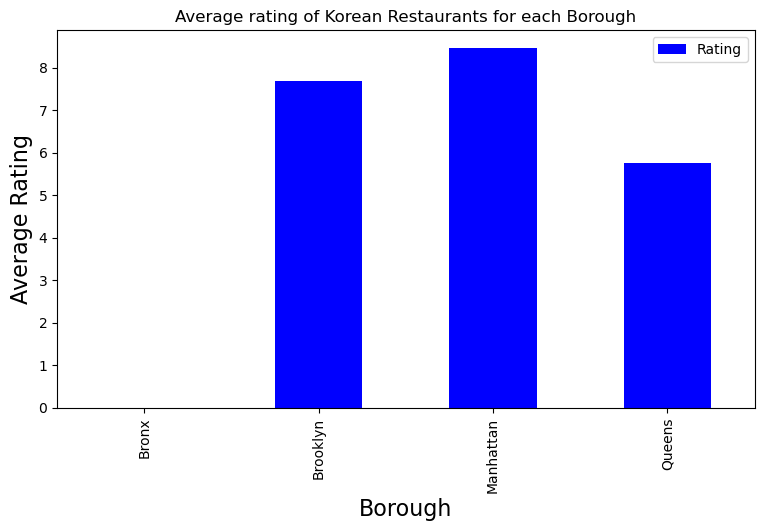

In [228]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Korean Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 16)
plt.ylabel('Average Rating', fontsize=16)
korean_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

Now let's find out all the neighborhoods with average rating greater or equal to 8.0 and then visualize them on a map

In [229]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
3,Clinton,8.500000
5,East Village,8.800000
6,Flatiron,8.400000
11,Manhattan Valley,8.100000
12,Midtown South,8.455556
14,North Side,8.200000
16,Prospect Heights,8.400000
19,Tribeca,8.900000
20,West Village,8.200000


Next, join this Dataset with our original New York data to get longitude and latitude

In [230]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Clinton,40.759101,-73.996119,8.500000
1,Manhattan,East Village,40.727847,-73.982226,8.800000
2,Manhattan,Flatiron,40.739673,-73.990947,8.400000
3,Manhattan,Manhattan Valley,40.797307,-73.964286,8.100000
4,Manhattan,Midtown South,40.748510,-73.988713,8.455556
5,Brooklyn,North Side,40.714823,-73.958809,8.200000
6,Brooklyn,Prospect Heights,40.676822,-73.964859,8.400000
7,Manhattan,Tribeca,40.721522,-74.010683,8.900000
8,Manhattan,West Village,40.734434,-74.006180,8.200000


In [231]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [232]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

According to our analysis, Queens have the most number of Korean restaurants. Manhattan comes in second place followed distantly by Brooklyn. Staten Island doesn’t have any Korean restaurant according to Foursquare data while Bronx has only one. Although Queens have the most number of Korean restaurants, when it comes to rating it’s Manhattan that comes out on the top, followed by Brooklyn. Among the 9 neighbourhoods with average rating of 8.o or more, 7 is located in Manhattan. The other two is in Brooklyn. Because of Manhattan’s highly rated restaurants it might be tempting to open a new Korean restaurant in that borough. But we have to keep in mind that it also has a lot more Korean restaurants than Brooklyn. On the other hand, restaurants in Queens don’t have good average ratings. So in my opinion Brooklyn is the best place to open a new Korean restaurant. While restaurants here are not as highly rated as in Manhattan, it has less competition and it has a lot more growth potential.

But I would like to add that, the above analysis is highly contingent on the accuracy of Foursquare data. To make a more informed decision, more data from other verified sources need to be incorporated into the analysis.